In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image as PILImage
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder # Can be an alternative if folders are structured correctly
from tqdm.notebook import tqdm # For progress bars (optional, install if needed)
import copy # To save best model weights

In [35]:
folder_path_potato_early = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Potato___Early_blight"
folder_path_potato_late = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Potato___Late_blight"
folder_path_potato_healthy = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Potato___healthy"

folder_path_bell_healthy = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Pepper__bell___healthy"
folder_path_bell_Bacterial_spot = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Pepper__bell___Bacterial_spot"

folder_path_tomato_Target = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato__Target_Spot"
folder_path_tomato_mosaic_virus = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato__Tomato_mosaic_virus"
folder_path_tomato_Curl_Virus = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus"
folder_path_tomato_Bacterial_spot = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_Bacterial_spot"
folder_path_tomato_Early = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_Early_blight"
folder_path_tomato_Late = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_Late_blight"
folder_path_tomato_leaf_mold = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_Leaf_Mold"
folder_path_tomato_Septoria_leaf = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_Septoria_leaf_spot"
folder_path_tomato_Spider_mites = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite"
folder_path_tomato_healthy = "/home/abdelrahmanelsayed/PC/My_Projects/CV/PlantVillage/Tomato_healthy"

image_files_potato_early = [os.path.join(folder_path_potato_early, file) for file in os.listdir(folder_path_potato_early) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_potato_late = [os.path.join(folder_path_potato_late, file) for file in os.listdir(folder_path_potato_late) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_potato_healthy = [os.path.join(folder_path_potato_healthy, file) for file in os.listdir(folder_path_potato_healthy) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_bell_healthy = [os.path.join(folder_path_bell_healthy, file) for file in os.listdir(folder_path_bell_healthy) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_bell_Bacterial_spot = [os.path.join(folder_path_bell_Bacterial_spot, file) for file in os.listdir(folder_path_bell_Bacterial_spot) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Target = [os.path.join(folder_path_tomato_Target, file) for file in os.listdir(folder_path_tomato_Target) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_mosaic_virus = [os.path.join(folder_path_tomato_mosaic_virus, file) for file in os.listdir(folder_path_tomato_mosaic_virus) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Curl_Virus = [os.path.join(folder_path_tomato_Curl_Virus, file) for file in os.listdir(folder_path_tomato_Curl_Virus) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Bacterial_spot = [os.path.join(folder_path_tomato_Bacterial_spot, file) for file in os.listdir(folder_path_tomato_Bacterial_spot) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Early = [os.path.join(folder_path_tomato_Early, file) for file in os.listdir(folder_path_tomato_Early) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Late = [os.path.join(folder_path_tomato_Late, file) for file in os.listdir(folder_path_tomato_Late) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_leaf_mold = [os.path.join(folder_path_tomato_leaf_mold, file) for file in os.listdir(folder_path_tomato_leaf_mold) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Septoria_leaf = [os.path.join(folder_path_tomato_Septoria_leaf, file) for file in os.listdir(folder_path_tomato_Septoria_leaf) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_Spider_mites = [os.path.join(folder_path_tomato_Spider_mites, file) for file in os.listdir(folder_path_tomato_Spider_mites) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]
image_files_tomato_healthy = [os.path.join(folder_path_tomato_healthy, file) for file in os.listdir(folder_path_tomato_healthy) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))]

# Combine all image files into a single list
image_files_potato = image_files_potato_early + image_files_potato_late + image_files_potato_healthy
image_files_bell = image_files_bell_healthy + image_files_bell_Bacterial_spot
image_files_tomato = image_files_tomato_Target + image_files_tomato_mosaic_virus + image_files_tomato_Curl_Virus + image_files_tomato_Bacterial_spot + image_files_tomato_Early + image_files_tomato_Late + image_files_tomato_leaf_mold + image_files_tomato_Septoria_leaf + image_files_tomato_Spider_mites + image_files_tomato_healthy

df_potato = pd.DataFrame(image_files_potato, columns=["File Path"])
df_bell = pd.DataFrame(image_files_bell, columns=["File Path"])
df_tomato = pd.DataFrame(image_files_tomato, columns=["File Path"])

# Combine DataFrames
data_potato = pd.concat([df_potato], ignore_index=True)
data_bell = pd.concat([df_bell], ignore_index=True)
data_tomato = pd.concat([df_tomato], ignore_index=True)

# Add labels
data_potato['Label'] = 'Potato'
data_bell['Label'] = 'Bell'
data_tomato['Label'] = 'Tomato'

# Combine potato and bell data
data = pd.concat([data_potato, data_bell, data_tomato], ignore_index=True)

data['Label_Str'] = ['potato'] * len(df_potato) + ['bell'] * len(df_bell) + ['tomato'] * len(df_tomato)
label_map = {'potato': 0, 'bell': 1, 'tomato': 2}
data['Label'] = data['Label_Str'].map(label_map)
data['Label'] = data['Label'].astype(int) 
data['File Path'] = data['File Path'].astype(str)

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [36]:
print("Combined DataFrame Head:")
print(data.head())
print("\nDataFrame Info:")
print(data.info())
print("\nValue Counts for Labels:")
print(data['Label_Str'].value_counts())

Combined DataFrame Head:
                                           File Path  Label Label_Str
0  /home/abdelrahmanelsayed/PC/My_Projects/CV/Pla...      1      bell
1  /home/abdelrahmanelsayed/PC/My_Projects/CV/Pla...      2    tomato
2  /home/abdelrahmanelsayed/PC/My_Projects/CV/Pla...      2    tomato
3  /home/abdelrahmanelsayed/PC/My_Projects/CV/Pla...      0    potato
4  /home/abdelrahmanelsayed/PC/My_Projects/CV/Pla...      2    tomato

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Path  20242 non-null  object
 1   Label      20242 non-null  int64 
 2   Label_Str  20242 non-null  object
dtypes: int64(1), object(2)
memory usage: 474.5+ KB
None

Value Counts for Labels:
Label_Str
tomato    15615
bell       2475
potato     2152
Name: count, dtype: int64



Image Dimension Statistics:
        Height    Width  Channels
count  20242.0  20242.0   20242.0
mean     256.0    256.0       3.0
std        0.0      0.0       0.0
min      256.0    256.0       3.0
25%      256.0    256.0       3.0
50%      256.0    256.0       3.0
75%      256.0    256.0       3.0
max      256.0    256.0       3.0

Unique Image Dimensions (Height, Width): [[256 256]]

All images have the same dimensions.

Unique Channel Counts:
Channels
3    20242
Name: count, dtype: int64


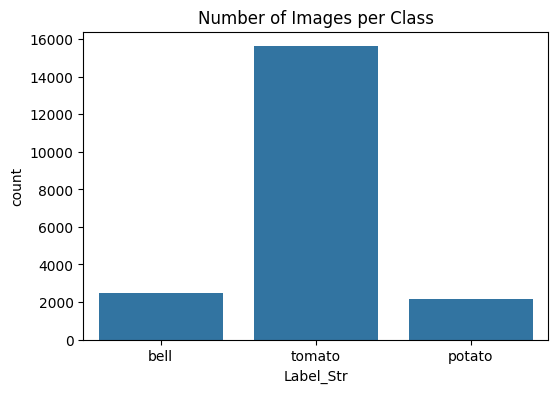

Label_Str
tomato    15615
bell       2475
potato     2152
Name: count, dtype: int64


In [37]:
image_dims = []
error_files = []
for file_path in data['File Path']:
    try:
        img = cv2.imread(file_path)
        if img is not None:
            image_dims.append(img.shape)
        else:
            print(f"Warning: Could not read image {file_path} with OpenCV. Skipping.")
            error_files.append(file_path)
    except Exception as e:
        print(f"Error reading image {file_path}: {e}")
        error_files.append(file_path)

if error_files:
    print(f"\nRemoving {len(error_files)} files that could not be read.")
    data = data[~data['File Path'].isin(error_files)].reset_index(drop=True)

dims_df = pd.DataFrame(image_dims, columns=['Height', 'Width', 'Channels'])
print("\nImage Dimension Statistics:")
print(dims_df.describe())
unique_dims = dims_df[['Height', 'Width']].drop_duplicates().values
print("\nUnique Image Dimensions (Height, Width):", unique_dims)
if len(unique_dims) > 1:
    print("\nWarning: Images have varying dimensions. Resizing will be necessary.")
else:
    print("\nAll images have the same dimensions.")
print("\nUnique Channel Counts:")
print(dims_df['Channels'].value_counts())
if (dims_df['Channels'] != 3).any():
     print("Warning: Not all images are 3-channel (RGB). Check/convert non-RGB images.")

plt.figure(figsize=(6, 4))
sns.countplot(x='Label_Str', data=data)
plt.title('Number of Images per Class')
plt.show()
print(data['Label_Str'].value_counts())

In [38]:
train_df, temp_df = train_test_split(
    data, test_size=0.30, random_state=42, stratify=data['Label'])

val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, stratify=temp_df['Label'])

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

Training samples: 14169
Validation samples: 3036
Test samples: 3037


In [39]:
class PlantDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame with 'File Path' and 'Label' columns.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.dataframe.iloc[idx]['File Path']
        try:
            # Use PIL for compatibility with torchvision transforms
            image = PILImage.open(img_path).convert('RGB') # Ensure 3 channels
        except Exception as e:
            print(f"Error loading image {img_path}: {e}. Returning None.")
            image = PILImage.open(img_path).convert('RGB')


        label = self.dataframe.iloc[idx]['Label']
        label = torch.tensor(label, dtype=torch.long)
        
        if self.transform:
            image = self.transform(image)

        return image, label 

In [40]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.00001
PATIENCE = 5 

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [41]:
train_transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop((IMG_HEIGHT, IMG_WIDTH), scale=(0.8, 1.0)), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

val_test_transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [42]:
train_dataset = PlantDataset(train_df, transform=train_transform)
val_dataset = PlantDataset(val_df, transform=val_test_transform)
test_dataset = PlantDataset(test_df, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

In [43]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):  # Updated to 3 classes
        super(SimpleCNN, self).__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), 
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) 
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) 
        )

        flattened_size = 128 * (IMG_HEIGHT // 8) * (IMG_WIDTH // 8)

        self.fc_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(flattened_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)  # Updated to output 3 classes
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.fc_block(x)
        return x

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [45]:
model = SimpleCNN(num_classes=3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [46]:
best_val_accuracy = 0.0
epochs_no_improve = 0
best_model_weights = None  # Store best weights here
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for epoch in range(EPOCHS):
    # --- Training Phase ---
    model.train()  # Set model to training mode (enables dropout, batch norm updates)
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=False)
    for inputs, labels in train_pbar:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1) 
        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0)

        train_pbar.set_postfix({'loss': loss.item()})


    epoch_train_loss = running_loss / total_samples
    epoch_train_acc = correct_predictions / total_samples
    history['train_loss'].append(epoch_train_loss)
    history['train_acc'].append(epoch_train_acc)

    # --- Validation Phase ---
    model.eval()  # Set model to evaluation mode (disables dropout, uses running stats for batch norm)
    running_val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Validate]", leave=False)
    with torch.no_grad():  # Disable gradient calculations
        for inputs, labels in val_pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1) 
            correct_val_predictions += (preds == labels).sum().item()
            total_val_samples += labels.size(0)
            val_pbar.set_postfix({'val_loss': loss.item()})

    epoch_val_loss = running_val_loss / total_val_samples
    epoch_val_acc = correct_val_predictions / total_val_samples
    history['val_loss'].append(epoch_val_loss)
    history['val_acc'].append(epoch_val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} => "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

    # --- Model Checkpoint & Early Stopping ---
    if epoch_val_acc > best_val_accuracy:
        print(f"Validation accuracy improved ({best_val_accuracy:.4f} --> {epoch_val_acc:.4f}). Saving model...")
        best_val_accuracy = epoch_val_acc
        # Save the best model state
        best_model_weights = copy.deepcopy(model.state_dict())
        torch.save(best_model_weights, 'best_pepper_classifier_pytorch.pth')
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        print(f"Validation accuracy did not improve for {epochs_no_improve} epoch(s).")

    if epochs_no_improve >= PATIENCE:
        print(f"Early stopping triggered after {epoch + 1} epochs.")
        break

if best_model_weights:
    print("Loading best model weights for final evaluation.")
    model.load_state_dict(best_model_weights)
else:
    print("Warning: No best model weights saved (perhaps training stopped early or didn't improve). Using last epoch weights.")

Epoch 1/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 1/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 1/50 => Train Loss: 0.4649, Train Acc: 0.8302 | Val Loss: 0.3332, Val Acc: 0.8709
Validation accuracy improved (0.0000 --> 0.8709). Saving model...


Epoch 2/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 2/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 2/50 => Train Loss: 0.3350, Train Acc: 0.8777 | Val Loss: 0.3089, Val Acc: 0.8811
Validation accuracy improved (0.8709 --> 0.8811). Saving model...


Epoch 3/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 3/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 3/50 => Train Loss: 0.2883, Train Acc: 0.8938 | Val Loss: 0.2287, Val Acc: 0.9081
Validation accuracy improved (0.8811 --> 0.9081). Saving model...


Epoch 4/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 4/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 4/50 => Train Loss: 0.2556, Train Acc: 0.9064 | Val Loss: 0.2086, Val Acc: 0.9190
Validation accuracy improved (0.9081 --> 0.9190). Saving model...


Epoch 5/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 5/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 5/50 => Train Loss: 0.2313, Train Acc: 0.9142 | Val Loss: 0.2066, Val Acc: 0.9150
Validation accuracy did not improve for 1 epoch(s).


Epoch 6/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 6/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 6/50 => Train Loss: 0.2108, Train Acc: 0.9238 | Val Loss: 0.1785, Val Acc: 0.9305
Validation accuracy improved (0.9190 --> 0.9305). Saving model...


Epoch 7/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 7/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 7/50 => Train Loss: 0.1930, Train Acc: 0.9301 | Val Loss: 0.1710, Val Acc: 0.9282
Validation accuracy did not improve for 1 epoch(s).


Epoch 8/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 8/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 8/50 => Train Loss: 0.1773, Train Acc: 0.9368 | Val Loss: 0.1230, Val Acc: 0.9578
Validation accuracy improved (0.9305 --> 0.9578). Saving model...


Epoch 9/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 9/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 9/50 => Train Loss: 0.1660, Train Acc: 0.9407 | Val Loss: 0.1304, Val Acc: 0.9519
Validation accuracy did not improve for 1 epoch(s).


Epoch 10/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 10/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 10/50 => Train Loss: 0.1571, Train Acc: 0.9447 | Val Loss: 0.1580, Val Acc: 0.9397
Validation accuracy did not improve for 2 epoch(s).


Epoch 11/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 11/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 11/50 => Train Loss: 0.1452, Train Acc: 0.9469 | Val Loss: 0.1080, Val Acc: 0.9615
Validation accuracy improved (0.9578 --> 0.9615). Saving model...


Epoch 12/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 12/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 12/50 => Train Loss: 0.1380, Train Acc: 0.9521 | Val Loss: 0.1131, Val Acc: 0.9572
Validation accuracy did not improve for 1 epoch(s).


Epoch 13/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 13/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 13/50 => Train Loss: 0.1335, Train Acc: 0.9519 | Val Loss: 0.0930, Val Acc: 0.9667
Validation accuracy improved (0.9615 --> 0.9667). Saving model...


Epoch 14/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 14/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 14/50 => Train Loss: 0.1253, Train Acc: 0.9558 | Val Loss: 0.1113, Val Acc: 0.9608
Validation accuracy did not improve for 1 epoch(s).


Epoch 15/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 15/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 15/50 => Train Loss: 0.1200, Train Acc: 0.9584 | Val Loss: 0.0927, Val Acc: 0.9648
Validation accuracy did not improve for 2 epoch(s).


Epoch 16/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 16/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 16/50 => Train Loss: 0.1116, Train Acc: 0.9608 | Val Loss: 0.1093, Val Acc: 0.9608
Validation accuracy did not improve for 3 epoch(s).


Epoch 17/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 17/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 17/50 => Train Loss: 0.1103, Train Acc: 0.9607 | Val Loss: 0.1084, Val Acc: 0.9621
Validation accuracy did not improve for 4 epoch(s).


Epoch 18/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 18/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 18/50 => Train Loss: 0.1072, Train Acc: 0.9637 | Val Loss: 0.0778, Val Acc: 0.9707
Validation accuracy improved (0.9667 --> 0.9707). Saving model...


Epoch 19/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 19/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 19/50 => Train Loss: 0.1049, Train Acc: 0.9637 | Val Loss: 0.0799, Val Acc: 0.9697
Validation accuracy did not improve for 1 epoch(s).


Epoch 20/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 20/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 20/50 => Train Loss: 0.0989, Train Acc: 0.9649 | Val Loss: 0.0756, Val Acc: 0.9733
Validation accuracy improved (0.9707 --> 0.9733). Saving model...


Epoch 21/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 21/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 21/50 => Train Loss: 0.0988, Train Acc: 0.9653 | Val Loss: 0.0787, Val Acc: 0.9674
Validation accuracy did not improve for 1 epoch(s).


Epoch 22/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 22/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 22/50 => Train Loss: 0.0929, Train Acc: 0.9668 | Val Loss: 0.0824, Val Acc: 0.9697
Validation accuracy did not improve for 2 epoch(s).


Epoch 23/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 23/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 23/50 => Train Loss: 0.0912, Train Acc: 0.9680 | Val Loss: 0.0812, Val Acc: 0.9704
Validation accuracy did not improve for 3 epoch(s).


Epoch 24/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 24/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 24/50 => Train Loss: 0.0855, Train Acc: 0.9695 | Val Loss: 0.0844, Val Acc: 0.9671
Validation accuracy did not improve for 4 epoch(s).


Epoch 25/50 [Train]:   0%|          | 0/443 [00:00<?, ?it/s]

Epoch 25/50 [Validate]:   0%|          | 0/95 [00:00<?, ?it/s]

Epoch 25/50 => Train Loss: 0.0902, Train Acc: 0.9665 | Val Loss: 0.0705, Val Acc: 0.9723
Validation accuracy did not improve for 5 epoch(s).
Early stopping triggered after 25 epochs.
Loading best model weights for final evaluation.


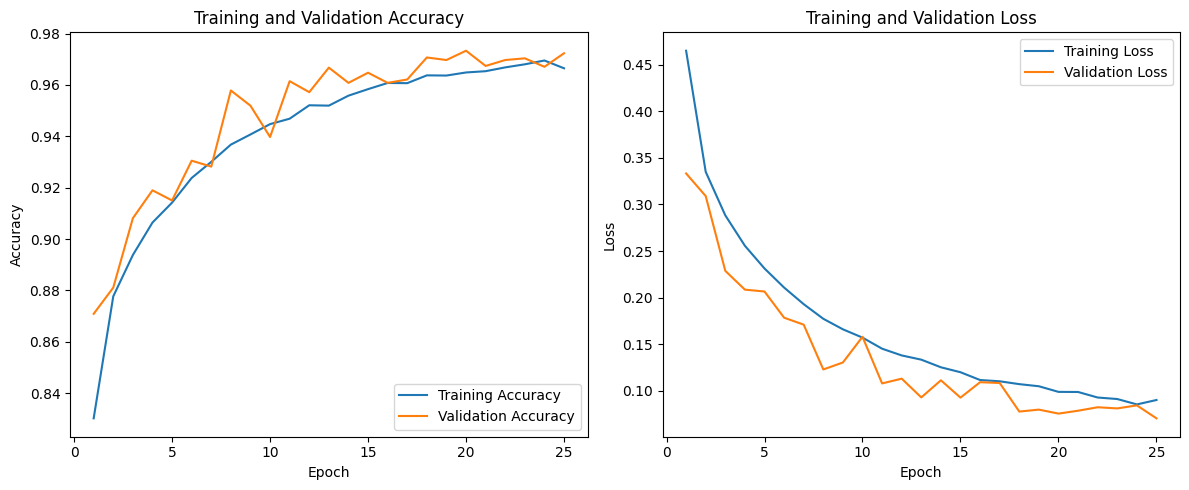

In [47]:
epochs_range = range(1, len(history['train_loss']) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history['train_acc'], label='Training Accuracy')
plt.plot(epochs_range, history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, history['train_loss'], label='Training Loss')
plt.plot(epochs_range, history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [48]:
model.eval()

all_preds = []
all_labels = []
test_loss = 0.0
total_test_samples = 0

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Testing"):
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels) # Calculate loss on test set as well

        test_loss += loss.item() * inputs.size(0)
        total_test_samples += labels.size(0)

        # Get predictions
        _, preds = torch.max(outputs, 1) # Get the index of the max log-probability
        all_preds.extend(preds.cpu().numpy()) # Move predictions to CPU and store
        all_labels.extend(labels.cpu().numpy()) # Move labels to CPU and store

final_test_loss = test_loss / total_test_samples

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

final_test_accuracy = accuracy_score(all_labels, all_preds)

print(f"\nTest Loss: {final_test_loss:.4f}")
print(f"Test Accuracy: {final_test_accuracy:.4f}")

Testing:   0%|          | 0/95 [00:00<?, ?it/s]


Test Loss: 0.0595
Test Accuracy: 0.9770



Classification Report:
              precision    recall  f1-score   support

      potato       0.95      0.90      0.93       323
        bell       0.98      0.95      0.96       371
      tomato       0.98      0.99      0.99      2343

    accuracy                           0.98      3037
   macro avg       0.97      0.95      0.96      3037
weighted avg       0.98      0.98      0.98      3037


Confusion Matrix:
[[ 292    0   31]
 [   2  354   15]
 [  13    9 2321]]


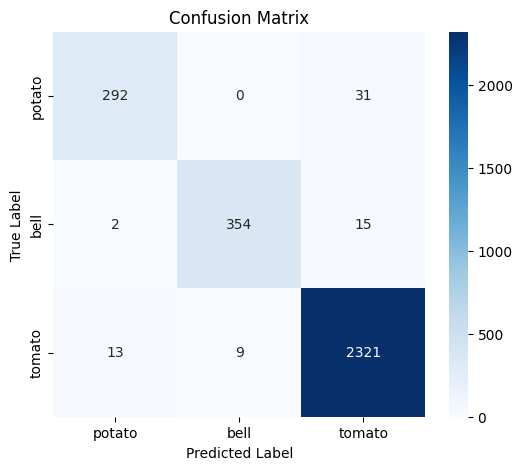

In [49]:
class_labels = [key for key, val in sorted(label_map.items(), key=lambda item: item[1])] # Sort by value (0, 1, 2)

print("\nClassification Report:")
# Ensure target_names are correct
print(classification_report(all_labels, all_preds, target_names=class_labels))

print("\nConfusion Matrix:")
cm = confusion_matrix(all_labels, all_preds)
print(cm)

# Plotting Confusion Matrix (should work fine with multi-class cm)
plt.figure(figsize=(6, 5)) # Adjust size if needed for 3 classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()